In [38]:
!pip install xgboost

In [39]:
# Import libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from xgboost import XGBClassifier

In [40]:
data=pd.read_csv(r"C:\Users\ayush\Downloads\Adult csv.csv")

data.head(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K


In [41]:
data.tail(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [42]:
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
# Null values

data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [44]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [45]:
print(data.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [46]:
print(data.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [47]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [48]:
data.workclass.replace({'?':'Others'},inplace=True)

print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


C:\Users\ayush\AppData\Local\Temp\ipykernel_39236\2799797328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [49]:
data.occupation.replace({'?':'Not Listed'},inplace=True)

print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Not Listed           2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


C:\Users\ayush\AppData\Local\Temp\ipykernel_39236\875583338.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Not Listed'},inplace=True)


In [50]:
print(data.relationship.value_counts())

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64


In [51]:
print(data.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [52]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']

print(data['workclass'].value_counts())




workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [71]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

In [72]:
data=data.drop(columns=['education'])
data

KeyError: "['education'] not found in axis"

In [ ]:

data.shape

In [ ]:
# Check outliers

for col in ['age','hours-per-week','capital-gain','capital-loss']:

       sns.boxplot(data[col])

       plt.title(f"Boxplot- {col}")

       plt.show()

# Cap outliers for 'hours-per-week'

data= data[data['hours-per-week']<80]


# Cap gain/loss


data['capital-gain']=np.where(data['capital-gain']>10000,10000,data['capital-gain'])

data['capital-loss']=np.where(data['capital-gain']>3000,3000,data['capital-loss'])





In [ ]:
data['capital-gain']=np.log1p(data['capital-gain'])

data['capital-loss']=np.log1p(data['capital-loss'])


In [ ]:
data=data[(data['age']<=75)&(data['age']>=17)]

In [ ]:
sns.boxplot(data['age'])
plt.show()

In [ ]:
for col in ['capital-gain', 'capital-loss','hours-per-week']:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot - {col} (after log1p & capping)")
    plt.show()


In [ ]:
x=data.drop("income",axis=1)

y=data["income"]

In [ ]:
categorical_cols=x.select_dtypes(include=['object']).columns.tolist()

numerical_cols=x.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical:",categorical_cols)

print("Numerical:",numerical_cols)

In [ ]:
numeric_transformer=Pipeline(steps=[('scaler',StandardScaler()) ])
categorical_transformer=Pipeline(steps=[('encoder',OneHotEncoder(handle_unknown='ignore'))
 ])

preprocessor= ColumnTransformer(transformers=[
    ('num',numeric_transformer,numerical_cols),
    ('cat',categorical_transformer,categorical_cols)
])                                        

In [ ]:
xgb_clf=XGBClassifier(

 n_estimators=200,

 learning_rate=0.1,

 max_depth=7,

      
 subsample=0.8,

 colsample_bytree=0.8,

 eval_metric='logloss',

 random_state=42   

)


model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',xgb_clf)

])    

In [73]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,stratify=y,random_state=42)

In [74]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y_train=le.fit_transform(y_train)

y_test=le.fit_transform(y_test)


In [75]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: Accuracy = {acc:.4f}")

C:\Users\ayush\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy = 0.8721
Logistic Regression: Accuracy = 0.8494
Decision Tree: Accuracy = 0.8218
Random Forest: Accuracy = 0.8570


Accuracy: 0.8727955754982782
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      7294
           1       0.77      0.66      0.71      2289

    accuracy                           0.87      9583
   macro avg       0.84      0.80      0.82      9583
weighted avg       0.87      0.87      0.87      9583



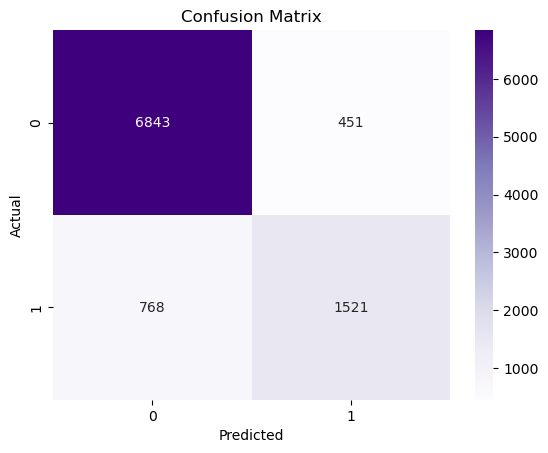

In [77]:
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)

print("Accuracy:",accuracy)

print("Classification report:\n",classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True,fmt='d',cmap='Purples')

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

In [78]:
import joblib

joblib.dump(model,"xgboost_salary_model.pkl")

['xgboost_salary_model.pkl']